<a href="https://colab.research.google.com/github/erumarquez/analisis_datos_eph/blob/main/Analisis_de_datos_con_EPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  tabulate import tabulate

In [ ]:
usu = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQbmOlmP2Zgb-cJeyDovGhMQVF3krjNaFU_HDfu3Mv0KAOCuk_mEXs-90PRMW7lv06gRcpPjLBW70bb/pub?output=csv', sep = ";" )


A partir de ahora, vamos a dedicar nuestros esfuerzos en filtrar los datos por region

In [ ]:
pob =usu[["PONDERA","AGLOMERADO"]]
pon_oc = pon_oc["PONDERA"].loc[(usu['AGLOMERADO'] == 1)]


pob = pob.groupby("AGLOMERADO")["PONDERA"].sum()
pob

In [ ]:
pob =usu[["PONDERA","AGLOMERADO"]]
pon_oc = pon_oc["PONDERA"].loc[(usu["AGLOMERADO"] == 32) & (usu["AGLOMERADO"] ==33)]


pob = pob.groupby("AGLOMERADO")["PONDERA"].sum()
pob

In [ ]:
pon_oc =usu[["PONDERA","ESTADO"]]
pon_oc = pon_oc["PONDERA"].loc[(usu['ESTADO'] == 1)]
pon_oc["AGLOMERADO"] = usu["AGLOMERADO"]
#pon_oc.info()
pon_oc = pon_oc.groupby("AGLOMERADO").sum()

In [ ]:
#Poblacion desocuapada por aglomerados
pon_desoc =usu[["PONDERA","ESTADO"]]
pon_desoc = pon_desoc["PONDERA"].loc[(usu['ESTADO'] == 2)]
pon_desoc["AGLOMERADO"] = usu["AGLOMERADO"]
#pon_oc.info()
pon_desoc = pon_desoc.groupby("AGLOMERADO").sum()

In [ ]:
pea = pon_oc + pon_desoc
pea

In [ ]:
#Poblacion ocupada demandante
pon_ocd =usu[["PONDERA","ESTADO","PP03J"]]
pon_ocd = pon_ocd["PONDERA"].loc[(usu['ESTADO'] == 1) & (usu["PP03J"] ==1)]
pon_ocd["AGLOMERADO"] = usu["AGLOMERADO"]
#pon_oc.info()
pon_ocd =pon_ocd.groupby("AGLOMERADO").sum()
pon_ocd

In [ ]:
#Subocupados demandantes
pon_subocd =usu[["PONDERA","ESTADO","PP03J","INTENSI"]]
pon_subocd = pon_subocd["PONDERA"].loc[(usu['ESTADO'] == 1) & (usu["PP03J"] ==1) & (usu["INTENSI"] == 1)]
pon_subocd["AGLOMERADO"] = usu["AGLOMERADO"]
pon_subocd =pon_subocd.groupby("AGLOMERADO").sum()
pon_subocd

In [ ]:
#Poblacion subocupada no demandante
pon_subocnd =usu[["PONDERA","ESTADO","PP03J","INTENSI"]]
pon_subocnd = pon_subocnd["PONDERA"].loc[(usu['ESTADO'] == 1) & (usu["PP03J"] !=1) & (usu["INTENSI"] == 1)]
pon_subocnd["AGLOMERADO"] = usu["AGLOMERADO"]
pon_subocnd =pon_subocnd.groupby("AGLOMERADO").sum()
pon_subocnd

In [ ]:
#~subocupados por aglomerados
sub_ag = pon_subocd + pon_subocnd
sub_ag

In [ ]:
#tasa de actividad por aglomerados
act = pea/pob
act

In [ ]:
#Tasa de empleo
emp = pon_oc/pob
emp

In [ ]:
#Tasa de desocupados
des = pon_desoc/pea
des

In [ ]:
#Tasa de subocupados demandantes
ocupd = pon_subocd/pea
ocupd

In [ ]:
#Tasa de subocupados
subocu = sub_ag/pea
subocu

In [ ]:
#Tasa de ocupados demandantes
ocupa_dem = pon_ocd/pea
ocupa_dem

In [ ]:
type(usu['REGION'].value_counts())

pandas.core.series.Series

In [ ]:
usu.describe()

,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH14,CH15,CH15_COD,CH16,CH16_COD,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,IMPUTA,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,PP03C,PP03D,PP3E_TOT,...,ADECOCUR,PONDIIO,TOT_P12,P47T,DECINDR,IDECINDR,RDECINDR,GDECINDR,PDECINDR,ADECINDR,PONDII,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,ITF,DECIFR,IDECIFR,RDECIFR,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,CH04d
count,46693.0,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,23333.000000,46693.000000,7043.000000,46693.00000,591.000000,46693.000000,46693.000000,46693.000000,46693.000000,54.0,46693.000000,46693.00000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,19014.000000,19014.000000,19014.000000,...,46693.000000,46693.000000,46693.000000,46619.000000,46693.000000,42611.000000,46693.000000,20014.000000,26679.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.000000,46693.00000,46693.000000,46693.000000,46693.000000,46693.00000,46693.000000,46693.000000,46693.0,46693.000000,46693.000000,46691.000000,46691.000000,46691.000000,46691.000000,46691.000000,46691.000000,46691.000000,46691.000000,46691.00000,46691.000000,46691.000000,46691.000000,46691.000000,46691.000000,46693.000000,46693.000000
mean,1.0,1.044503,2.548069,0.869766,22.718609,616.947680,2.497162,1.522005,35.819952,3.501467,2.251644,1.103634,1.687405,0.360996,3.928105,1.454222,4.546179,1.423789,71.955417,1.33414,69.967851,3.724477,2.274816,1.178078,1.631529,1.0,0.064571,0.04763,0.060630,0.068597,0.065920,0.049001,0.067655,0.070182,0.019703,0.833037,0.830981,0.971915,0.156096,33.206469,...,2.501874,616.940848,680.318527,19814.440786,3.725505,3.784398,3.859915,3.809983,3.800405,3.858201,616.937228,4627.490630,75.299402,10.442101,469.80072,179.268820,24.025036,43.882316,21.49320,326.744823,4.924828,0.0,713.585848,6432.166813,61272.261742,6.711443,6.182069,6.854854,2.946821,3.885952,6.892913,18586.089942,5.83213,5.282924,6.017005,2.591249,3.359234,6.045169,616.937699,0.522005
std,0.0,0.826631,1.645974,0.341240,18.914093,1202.888326,1.598322,0.499521,22.439663,1.639832,2.075717,0.376808,0.565381,0.603735,2.472922,0.594879,14.105146,0.843767,83.267821,1.21054,95.802661,1.797478,1.134413,1.386689,1.850579,0.0,0.344839,0.26456,0.328001,0.361188,0.350408,0.271977,0.357433,0.367412,0.290335,0.981369,0.979444,0.409289,0.600264,29.999021,...,3.807974,1320.145639,5231.158931,31705.829005,4.028136,4.042871,4.100951,4.136073,4.028239,4.106195,1344.232751,13435.030275,4530.580037,284.229875,2849.00728,2944.675096,1317.334459,3863.502433,582.02859,2918.866252,376.327369,0.0,3932.499187,17729.828750,59675.746294,3.508663,3.807567,3.506660,4.158132,4.223809,3.506609,21854.904449,3.77638,3.906419,3.761059,3.957409,4.003686,3.769771,1580.464850,0.499521
min,1.0,1.000000,1.000000,0.000000,2.000000,18.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,2.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,-9.000000,0.0,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,1.000000,1.000000,10.000000,157.000000,1.000000,1.000000,17.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,

In [ ]:
columna_edad = "CH06"
columna_educacion = "NIVEL_ED" # 6 
columna_ocup = "CAT_OCUP" # 3
columna_ingresos = "P47T"

In [ ]:
"""
Pondih: ingresos familiares 
Pondii: ingreso individual
Pondiio: ingreso de la ocupación principal
Pondera: todo lo que no es ingreso
"""

'\nPondih: ingresos familiares \nPondii: ingreso individual\nPondiio: ingreso de la ocupación principal\nPondera: todo lo que no es ingreso\n'

In [ ]:
COLUMNAS = {1 : "Primaria Incompleta",
2 : "Primaria Completa",
3 : "Secundaria Incompleta",
4 : "Secundaria Completa",
5 : "Superior Universitaria Incompleta",
6 : "Superior Universitaria Completa",
7 : "Sin instrucción"}

In [ ]:
ajuste_inflacion = 85.02/67.73
min_edad = 25
max_edad = 33
filtro_edad = (min_edad <= usu[columna_edad]) & (max_edad >= usu[columna_edad])
filtro_ocup = usu[columna_ocup] == 3
filtro_ingresos_positivos = usu[columna_ingresos ] >0


usu_jovenes = usu.loc[filtro_edad & filtro_ocup & filtro_ingresos_positivos][["PONDII", columna_educacion, columna_ingresos, "REGION", "TOT_P12", "P21", "T_VI"]]
usu_jovenes["WEIGHTS"] = usu_jovenes["PONDII"]/usu_jovenes["PONDII"].sum()
usu_jovenes[[columna_ingresos, "TOT_P12", "P21", "T_VI"]] *= ajuste_inflacion

In [ ]:
usu_temp = usu_jovenes.query("NIVEL_ED == 2 & REGION == 1")
(usu_temp["P47T"] * usu_temp["WEIGHTS"] /usu_temp["WEIGHTS"].sum() ).sum()

37741.182113145085

In [ ]:
regiones = {
    1: "Gran Buenos Aires",
    40:"NOA",
    41 :"NEA",
    42: "Cuyo",
    43: "Pampeana",
    44: "Patagónica"
}

In [ ]:
ponderador = "WEIGHTS"
usu_temp = usu_jovenes.query("NIVEL_ED == 5 & REGION == 1")
(usu_temp["P47T"] * usu_temp["WEIGHTS"] /usu_temp["WEIGHTS"].sum() ).sum()


79206.9864208958

In [ ]:
def mediana_weighted(usu):
  ponderador = "WEIGHTS"
  usu = usu.sort_values(columna_ingresos)
  # print(usu)
  cumsum = usu[ponderador].cumsum()
  #print(cumsum.iloc[-1])
  cutoff = usu[ponderador].sum() *.5
  median = usu[columna_ingresos][cumsum >= cutoff].iloc[0]
  return median

def mean_weighted(usu):
  return (usu["P47T"] * usu["WEIGHTS"] /usu["WEIGHTS"].sum() ).sum()
  

usu_agrupado = usu_jovenes.groupby(["NIVEL_ED", "REGION"]).apply(mediana_weighted).unstack().round(0)
usu_agrupado.rename(COLUMNAS, inplace=True)
usu_agrupado.rename(regiones, inplace=True, axis=1)
usu_agrupado

REGION,Gran Buenos Aires,NOA,NEA,Cuyo,Pampeana,Patagónica
NIVEL_ED,,,,,,
Primaria Incompleta,NaN,27616.0,25545.0,23029.0,40169.0,40169.0
Primaria Completa,43935.0,22595.0,20084.0,25106.0,37658.0,38914.0
Secundaria Incompleta,25106.0,22595.0,25106.0,30127.0,31382.0,50211.0
Secundaria Completa,45190.0,35148.0,30127.0,35148.0,43935.0,69040.0
Superior Universitaria Incompleta,62764.0,29122.0,32637.0,30127.0,49207.0,50211.0
Superior Universitaria Completa,63392.0,43935.0,50211.0,53098.0,56488.0,72806.0
Sin instrucción,NaN,NaN,25733.0,NaN,37658.0,NaN


In [ ]:
usu_temp = usu_agrupado.T[["Secundaria Completa", "Superior Universitaria Completa"]]
usu_temp["Diff. Nominal"] = usu_temp["Superior Universitaria Completa"] - usu_temp["Secundaria Completa"]
usu_temp["Diff. Porcentual"] = usu_temp["Superior Universitaria Completa"] / usu_temp["Secundaria Completa"] * 100 - 100
usu_temp.round()

NIVEL_ED,Secundaria Completa,Superior Universitaria Completa,Diff. Nominal,Diff. Porcentual
REGION,,,,
Gran Buenos Aires,45190.0,63392.0,18202.0,40.0
NOA,35148.0,43935.0,8787.0,25.0
NEA,30127.0,50211.0,20084.0,67.0
Cuyo,35148.0,53098.0,17950.0,51.0
Pampeana,43935.0,56488.0,12553.0,29.0
Patagónica,69040.0,72806.0,3766.0,5.0


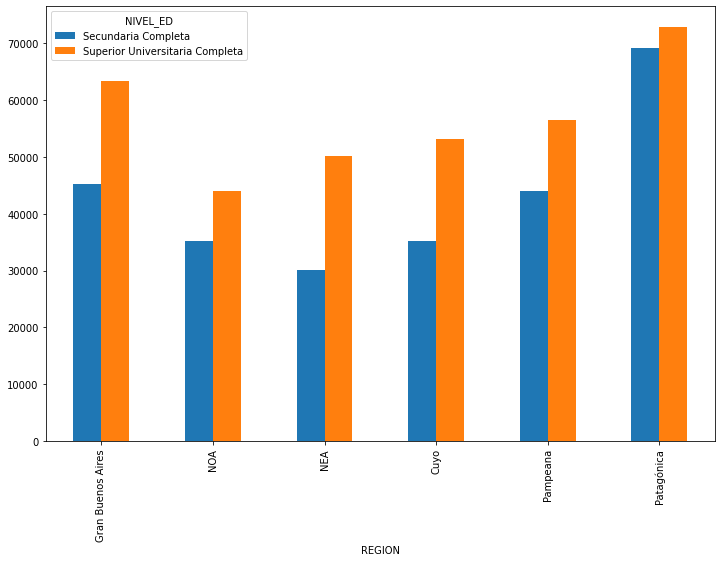

In [ ]:
usu_temp[["Secundaria Completa", "Superior Universitaria Completa"]].plot.bar(figsize=(12, 8))

In [ ]:
agrupacion_nivel_ed = usu_jovenes.groupby("NIVEL_ED").mean()
agrupacion_nivel_ed.rename(COLUMNAS, inplace=True)

In [ ]:
agrupacion_nivel_ed[["P47T"]]

,P47T
NIVEL_ED,
Primaria Incompleta,44849.943378
Primaria Completa,33470.355225
Secundaria Incompleta,39038.998263
Secundaria Completa,46974.031190
Superior Universitaria Incompleta,46641.772888
Superior Universitaria Completa,62064.001018
Sin instrucción,23065.738964


Text(0.5, 1.0, 'Nivel Educativo: Personas de 25 a 33 años')

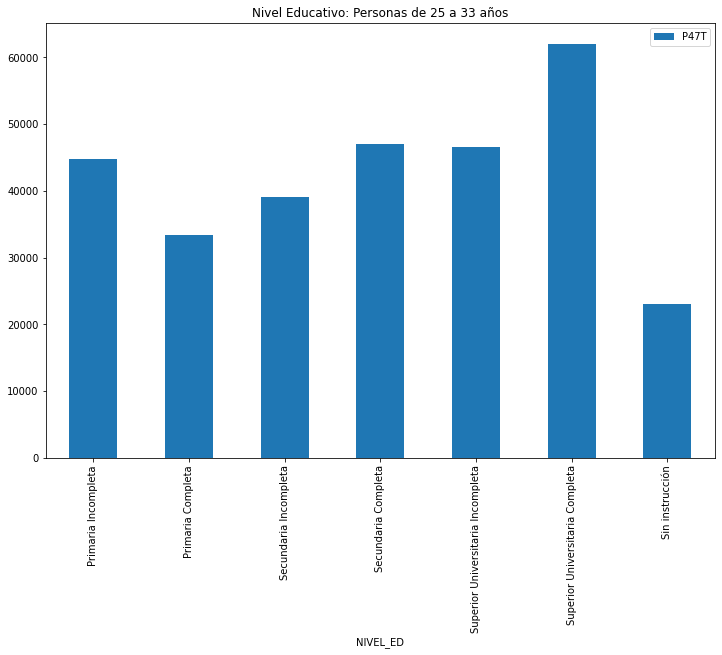

In [ ]:
import matplotlib.ticker as mtick
ax = agrupacion_nivel_ed[["P47T"]].plot.bar(figsize=(12, 8))
ax.set_title(f"Nivel Educativo: Personas de {min_edad} a {max_edad} años")

Text(0.5, 1.0, 'Nivel Educativo: Personas de 25 a 33 años')

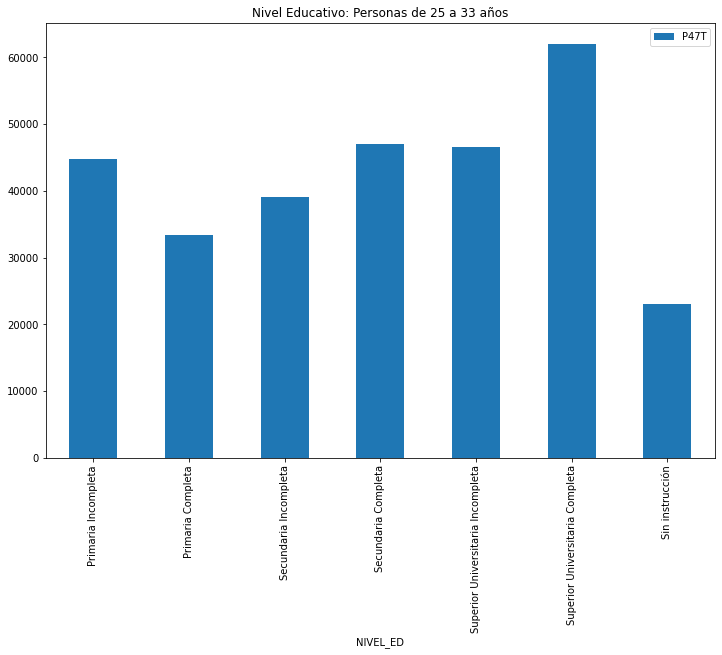

In [ ]:
import matplotlib.ticker as mtick
ax = agrupacion_nivel_ed[["P47T"]].plot.bar(figsize=(12, 8))
ax.set_title(f"Nivel Educativo: Personas de {min_edad} a {max_edad} años")